This is the fourth and final notebook for this course. I ultimately decided to turn this project into a binary classification problem due to the severely unbalanced nature of the target classes, and low density of some of those classes, which complicated having a stratified y for training and testing. Therefore, all of the non-heating related instances have been classified as 0 and all heating or hot water instances have been labeled as 1. This is the data set imported from the previous notebook.  

In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
#from project_lib import Project
#project = Project(project_id='58548218-d78e-4251-95d2-67ed44feff5d', project_access_token='p-17588375ba270ce7d8e2f7d2651fde17fb64de66')
#pc = project.project_context

In [2]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import types
import pandas as pd
#from botocore.client import Config
#import ibm_boto3

#def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
#client_2e2f0b3c376d4e9586d0fa475f0d4cf6 = ibm_boto3.client(service_name='s3',
    #ibm_api_key_id='ODq1RiDzqvK_ZHr2wJ_StMrShRahDkxYnRtHr-0ER_Th',
    #ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    #config=Config(signature_version='oauth'),
    #endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

#body = client_2e2f0b3c376d4e9586d0fa475f0d4cf6.get_object(Bucket='edx1-donotdelete-pr-88qux6w8ehqfye',Key='final_df2.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
#if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

#df_data_1 = pd.read_csv(body, low_memory=True)
comp_df = pd.read_csv('desktop/edx IBM/final_df2_binary.csv', index_col='Unnamed: 0')
comp_df.head()

,Complaint Type,lotarea,bldgarea,numbldgs,numfloors,lotdepth,bldgdepth,yearbuilt,builtfar,residfar,facilfar
0,1,4308.0,2160.0,1.0,1.0,123.67,40.0,1931.0,0.5,4.0,4.0
1,1,4308.0,2160.0,1.0,1.0,123.67,40.0,1931.0,0.5,4.0,4.0
2,1,4308.0,2160.0,1.0,1.0,123.67,40.0,1931.0,0.5,4.0,4.0
3,1,4308.0,2160.0,1.0,1.0,123.67,40.0,1931.0,0.5,4.0,4.0
4,1,4308.0,2160.0,1.0,1.0,123.67,40.0,1931.0,0.5,4.0,4.0


In [3]:
#Import most necessary libraries

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [4]:
#Separate features (X) from target (y)

X = comp_df.iloc[:, 1:]
y = comp_df.iloc[:, 0]

Preprocessing: The Column Transformer is a pipeline style class that allows for all preprocessing to be done at one, before the split into training and test data.
All of the numeric features have been scaled using the standard scalar. I tried a variety of different scalers and the Normalizer class. It made a marginaly worse difference for the SGD classifer, but there was no majoor difference among the other classifiers. Because this is done up front, all classifiers use the same train test split, generating more confidence in comparison.

In [5]:
numeric_features=['lotarea', 'bldgarea', 'numbldgs', 'numfloors', 'lotdepth', 'bldgdepth', 'builtfar',  'residfar',  'facilfar']
numeric_transformer=Pipeline(steps=[('scaler', StandardScaler())])
categorical_features = ['yearbuilt']
categorical_transformer = Pipeline(steps = [('one hot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features), ('cat', categorical_transformer, categorical_features)])
preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=8, stratify=y)

The remaining cells use five different classifiers on the split data: Decision Tree Classifier, K Nearest Neighbors, Random Forest Classifier, Logistic Regression, and Stochastic Gradient Descent Classifier. All classifiers have a confusion matrix and classification report. The Decision Tree and Random Forest have an additional graph showing which features were the most important. All classifier use the default settings from Sci-Kit Learn. 

[[ 69390  91142]
 [ 35744 248930]]


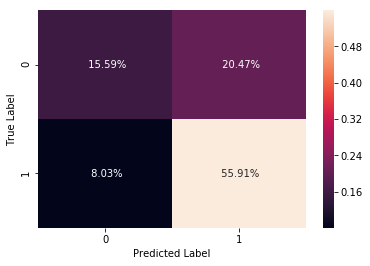

              precision    recall  f1-score   support

           0       0.66      0.43      0.52    160532
           1       0.73      0.87      0.80    284674

    accuracy                           0.71    445206
   macro avg       0.70      0.65      0.66    445206
weighted avg       0.71      0.71      0.70    445206



In [6]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
tree_class = DecisionTreeClassifier()
tree_class.fit(X_train, y_train)
y_pred_tree = tree_class.predict(X_test)
tree_class.score(X_test, y_test)

tree_conf_mat = confusion_matrix(y_test, y_pred_tree)
print(tree_conf_mat)
sns.heatmap(tree_conf_mat/np.sum(tree_conf_mat), annot=True, fmt=' .2%')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(classification_report(y_test, y_pred_tree))

Feature Ranking
1. feature 7 (0.205364) name: numfloors
2. feature 1 (0.184747) name: bldgarea
3. feature 5 (0.139547) name: lotdepth
4. feature 0 (0.137492) name: builtfar
5. feature 6 (0.119727) name: residfar
6. feature 4 (0.115408) name: yearbuilt
7. feature 8 (0.045812) name: facilfar
8. feature 3 (0.021398) name: lotarea
9. feature 9 (0.019825) name: numbldgs
10. feature 2 (0.010680) name: bldgdepth


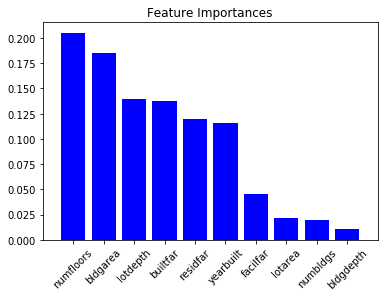

In [7]:
importances = tree_class.feature_importances_
indices = np.argsort(importances)[::-1]
feature_list = [X.columns[indices[f]] for f in range(X.shape[1])]
ff = np.array(feature_list)

print('Feature Ranking')

for f in range(X.shape[1]):
    print('%d. feature %d (%f) name: %s' % (f + 1, indices[f], importances[indices[f]], ff[indices[f]]))
    
plt.figure()
plt.rcParams['figure.figsize'] = [10, 6]
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], color='b', align='center')
plt.xticks(range(X.shape[1]), ff[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()

[[ 77634  82898]
 [ 63030 221644]]


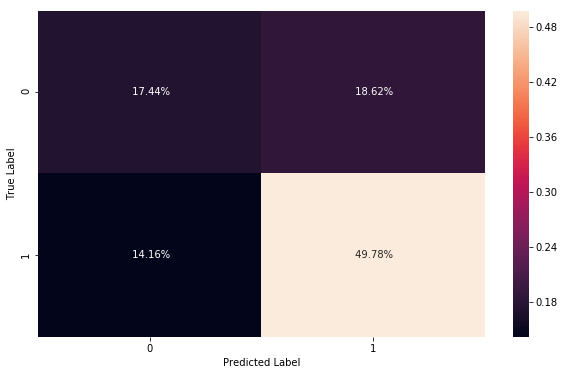

              precision    recall  f1-score   support

           0       0.55      0.48      0.52    160532
           1       0.73      0.78      0.75    284674

    accuracy                           0.67    445206
   macro avg       0.64      0.63      0.63    445206
weighted avg       0.66      0.67      0.67    445206



In [8]:
#KNN with defaults

from sklearn.neighbors import KNeighborsClassifier
knn_class = KNeighborsClassifier(n_neighbors=5)
knn_class.fit(X_train, y_train)
y_pred_knn = knn_class.predict(X_test)
knn_class.score(X_test, y_test)

knn_conf_mat = confusion_matrix(y_test, y_pred_knn)
print(knn_conf_mat)
sns.heatmap(knn_conf_mat/np.sum(knn_conf_mat), annot=True, fmt=' .2%')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(classification_report(y_test, y_pred_knn))

[[ 68481  92051]
 [ 34754 249920]]


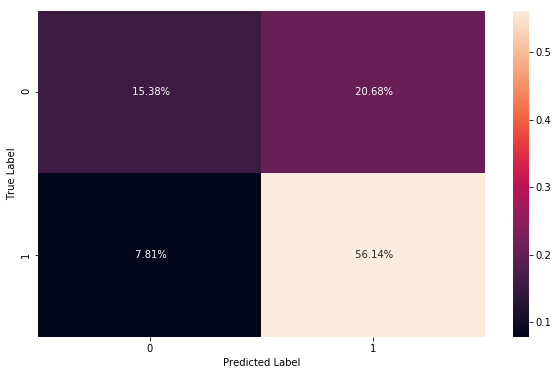

              precision    recall  f1-score   support

           0       0.66      0.43      0.52    160532
           1       0.73      0.88      0.80    284674

    accuracy                           0.72    445206
   macro avg       0.70      0.65      0.66    445206
weighted avg       0.71      0.72      0.70    445206



In [9]:
#Random forest with defaults

from sklearn.ensemble import RandomForestClassifier
rf_class = RandomForestClassifier()
rf_class.fit(X_train, y_train)
y_pred_rf = rf_class.predict(X_test)
rf_class.score(X_test, y_test)

rf_conf_mat = confusion_matrix(y_test, y_pred_rf)
print(rf_conf_mat)
sns.heatmap(rf_conf_mat/np.sum(rf_conf_mat), annot=True, fmt=' .2%')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(classification_report(y_test, y_pred_rf))

Feature Ranking
1. feature 1 (0.172707) name: builtfar
2. feature 7 (0.164957) name: numfloors
3. feature 0 (0.152843) name: bldgarea
4. feature 4 (0.131825) name: bldgdepth
5. feature 5 (0.125995) name: yearbuilt
6. feature 6 (0.123718) name: residfar
7. feature 8 (0.050689) name: facilfar
8. feature 3 (0.033131) name: lotdepth
9. feature 9 (0.029993) name: numbldgs
10. feature 2 (0.014142) name: lotarea


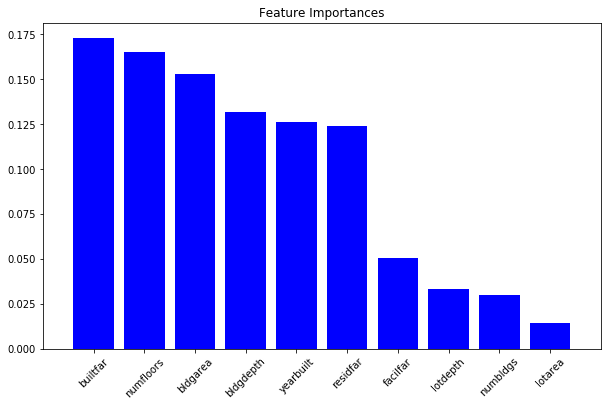

In [10]:
importances = rf_class.feature_importances_
indices = np.argsort(importances)[::-1]
feature_list = [X.columns[indices[f]] for f in range(X.shape[1])]
ff = np.array(feature_list)

print('Feature Ranking')

for f in range(X.shape[1]):
    print('%d. feature %d (%f) name: %s' % (f + 1, indices[f], importances[indices[f]], ff[indices[f]]))
    
plt.figure()
plt.rcParams['figure.figsize'] = [10, 6]
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], color='b', align='center')
plt.xticks(range(X.shape[1]), ff[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()

[[   865 159667]
 [  1082 283592]]


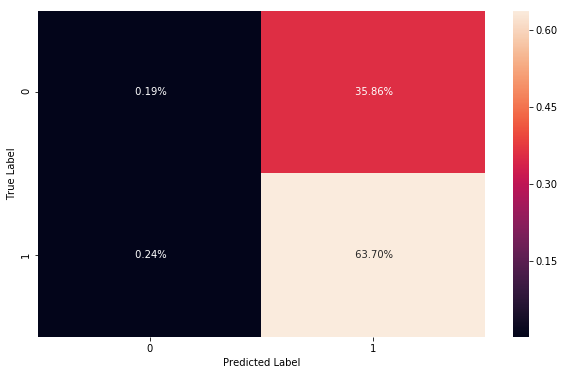

              precision    recall  f1-score   support

           0       0.44      0.01      0.01    160532
           1       0.64      1.00      0.78    284674

    accuracy                           0.64    445206
   macro avg       0.54      0.50      0.39    445206
weighted avg       0.57      0.64      0.50    445206



In [11]:
#Logistic regression with defaults

from sklearn.linear_model import LogisticRegression
log_class = LogisticRegression()
log_class.fit(X_train, y_train)
y_pred_log = log_class.predict(X_test)
log_class.score(X_test, y_test)

log_conf_mat = confusion_matrix(y_test, y_pred_log)
print(log_conf_mat)
sns.heatmap(log_conf_mat/np.sum(log_conf_mat), annot=True, fmt=' .2%')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(classification_report(y_test, y_pred_log))

[[ 90684  69848]
 [153924 130750]]


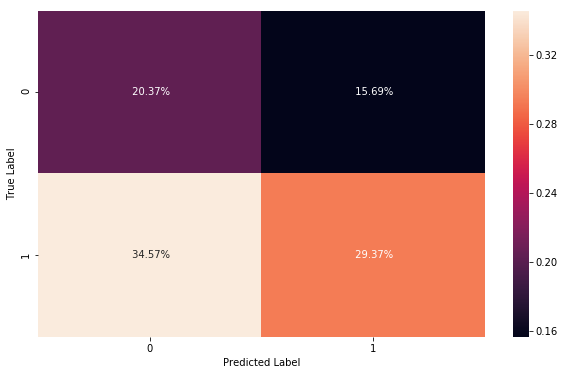

              precision    recall  f1-score   support

           0       0.37      0.56      0.45    160532
           1       0.65      0.46      0.54    284674

    accuracy                           0.50    445206
   macro avg       0.51      0.51      0.49    445206
weighted avg       0.55      0.50      0.51    445206



In [12]:
from sklearn.linear_model import SGDClassifier
sgd_class = SGDClassifier()
sgd_class.fit(X_train, y_train)
y_pred_sgd = sgd_class.predict(X_test)
sgd_class.score(X_test, y_test)

sgd_conf_mat = confusion_matrix(y_test, y_pred_sgd)
print(sgd_conf_mat)
sns.heatmap(sgd_conf_mat/np.sum(sgd_conf_mat), annot=True, fmt=' .2%')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(classification_report(y_test, y_pred_sgd))

CONCLUDING REMARKS: Decision Tree and Random Forest classifiers performed the best out of the five. KNN performed slightly better on classifying heating issues, but did noticebly worse classifying non-heating issues. Logistic regression overclassified samples as heating issues, which gave it better Class 1 recall scores, but failed to capture non-heating issues accurately. SGD did better than all the rest at classifying non-heating issues, but was much worse at classifying heating issues. The Decision Tree and Random Forest classifiers were esstentially identical, except for the order of feature importances. The two classifiers shared four of their top five features: builtfar (building floor to area ratio), numfloors (number of floors), bldgarea (building area), and yearbuilt (year built).  Future analysis of housing complaints should focus on those four building aspects in order to best serve the residents of the Bronx. For example, as indicated in the graph below, buildings built in the 1920s have the highest number of complaints.

In [66]:
sns.catplot(y='yearbuilt', hue='Complaint Type', data=comp_df, kind='count', height=300, aspect=.5)
plt.legend(('Non-Heating', 'Heating'), loc='upper center', fontsize=200)
plt.ylabel('Year Built', fontsize=200)
plt.yticks(fontsize=100)
plt.xlabel('Number of Complaints by Type', fontsize=100)
plt.show()